In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y), axis=1)


In [7]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
manhattan_acc = accuracy_score(y_test, y_pred_manhattan)


In [8]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
euclidean_acc = accuracy_score(y_test, y_pred_euclidean)

In [9]:
print(f"Manhattan Distance Accuracy: {manhattan_acc:.4f}")
print(f"Euclidean Distance Accuracy: {euclidean_acc:.4f}")

Manhattan Distance Accuracy: 0.9333
Euclidean Distance Accuracy: 0.9333


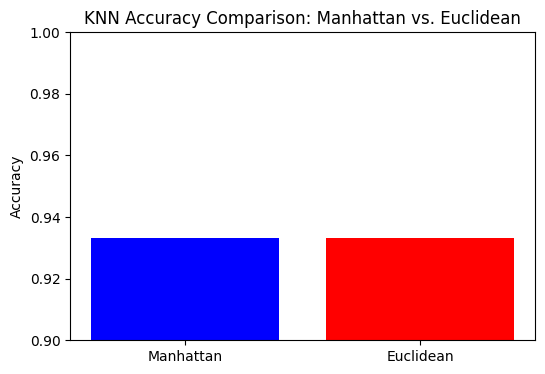

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(['Manhattan', 'Euclidean'], [manhattan_acc, euclidean_acc], color=['blue', 'red'])
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison: Manhattan vs. Euclidean")
plt.ylim(0.9, 1.0)
plt.show()

In [11]:
print("\nExplanation:")
print("Manhattan distance sums absolute differences, making it less sensitive to outliers.")
print("Euclidean distance considers straight-line distance, often performing better in continuous spaces.")
print("Results may vary based on dataset structure.")


Explanation:
Manhattan distance sums absolute differences, making it less sensitive to outliers.
Euclidean distance considers straight-line distance, often performing better in continuous spaces.
Results may vary based on dataset structure.
